<a href="https://colab.research.google.com/github/Karlajack/Machine_Learning_24e/blob/main/week_2_Abolean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Week 2
### Regression Notes by Cyril Michino
1. Day 1: Linear Regression
2. Day 2: Polynomial Regression
3. Day 3: Regularised Regression
4. Day 4: Logistic Regression (Classification)
5. Day 5: Regression Weekly Project

## Day 1: Linear Regression
1. Understanding how linear regression works
2. Exploring and preparing data for regression
2. Building a linear regression with Scikit Learn
3. Evaluating performance of a linear regression
4. Visualising the output of a regression (coefficients)

In [ ]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
pip install ucimlrepo

In [ ]:
from sklearn.datasets import load_diabetes

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
# from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler,PolynomialFeatures,MinMaxScaler,RobustScaler,LabelEncoder

In [ ]:
#abalone= fetch_ucirepo (id=1)
#X = abalone.data.features
#y = abalone.data.targets





In [ ]:
# import data
abalone=pd.read_csv("/content/abalone.csv")
df=abalone
df.head(2)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7


### Data Exploration

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [ ]:
categorical_cols=df.select_dtypes(include=['object']).columns

numerical_cols=df.select_dtypes(include=['float64','int64']).columns

In [ ]:


le=LabelEncoder()
cat_encoded=df[categorical_cols].apply(le.fit_transform)
cat_encoded.head(2)

,Sex
0,2
1,2


In [ ]:
df=pd.concat([df[numerical_cols],cat_encoded],axis=1)
df

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex,Sex,Sex,Sex,Sex,Sex,Sex,Sex,Sex
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,M,2,2,M,2,2,2,2,2
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,M,2,2,M,2,2,2,2,2
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,F,0,0,F,0,0,0,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,M,2,2,M,2,2,2,2,2
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,I,1,1,I,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,F,0,0,F,0,0,0,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,M,2,2,M,2,2,2,2,2
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,M,2,2,M,2,2,2,2,2
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,F,0,0,F,0,0,0,0,0


ValueError: y should be a 1d array, got an array of shape () instead.

In [ ]:
x=df.drop('Sex',axis=1)

In [ ]:
df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


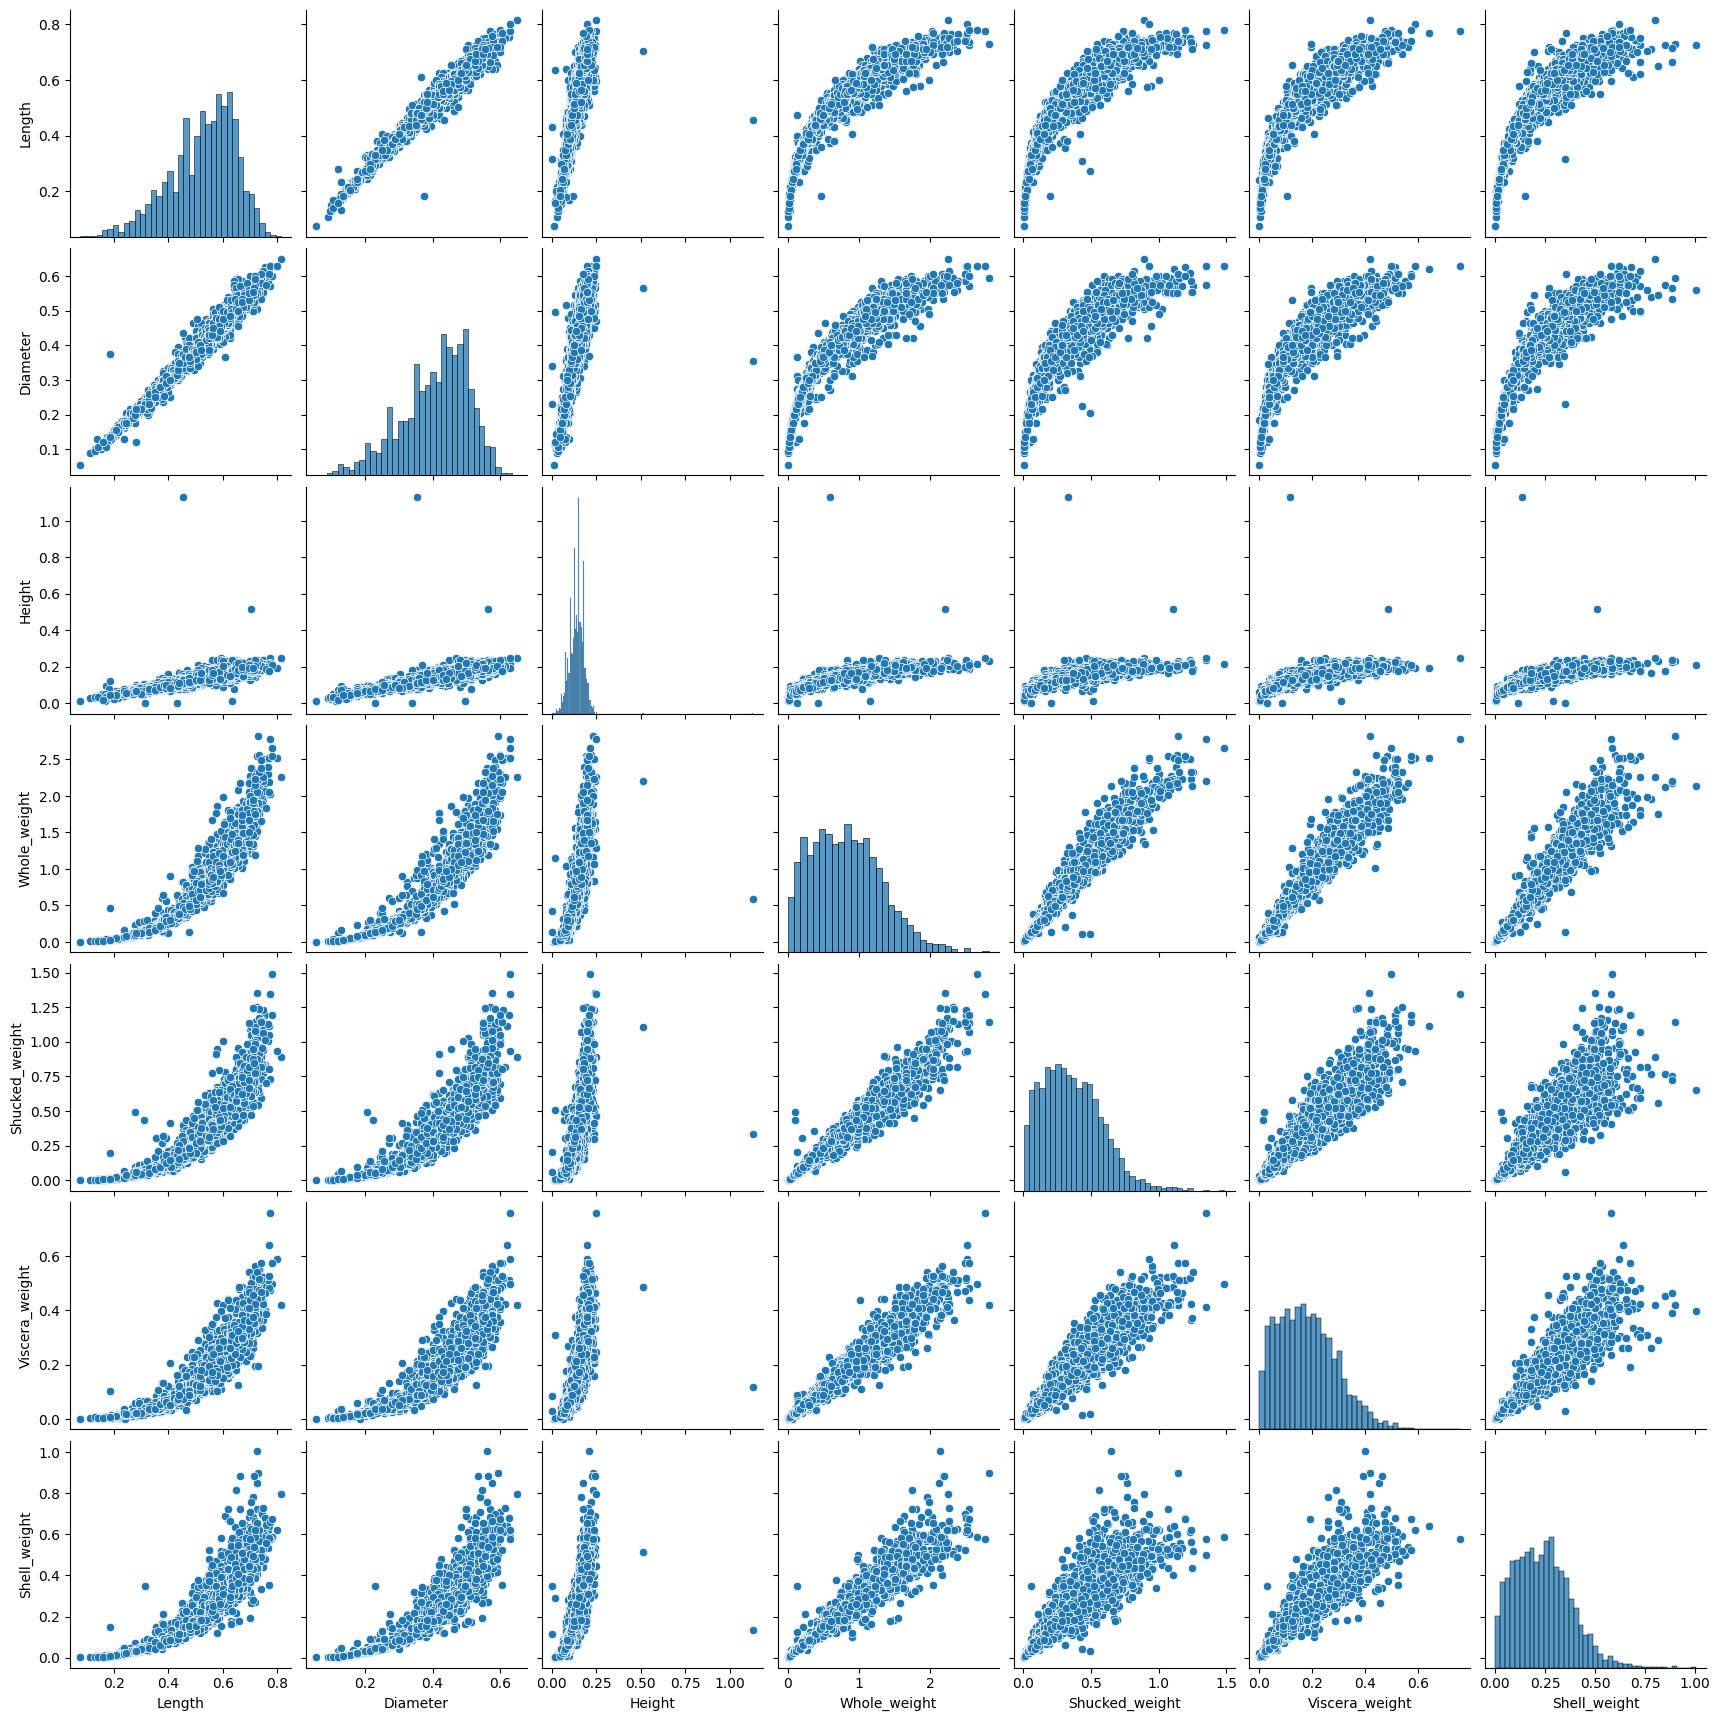

In [ ]:
## Visualise the dataset with scatter plots
sns.pairplot(df)
plt.show()

In [ ]:

df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


### Building a Linear Regression Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3341, 8) (836, 8) (3341, 1) (836, 1)


In [ ]:
model = LinearRegression()
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(math.sqrt(mse))

ValueError: could not convert string to float: 'I'

In [ ]:
print('Coefficients: ', model.coef_) #Get the coefficients for all the features in the dataset
print('Y-Intercept: ', model.intercept_) #The intercept of the model or the constant in the regression equation

Coefficients:  [ 8.82875005e-02 -2.23311488e+01  6.02161395e+00  1.04455692e+00
 -1.39634880e+00  9.03278029e-01  6.18163619e-01  6.94721527e+00
  7.89639530e+01  7.59207959e-02]
Y-Intercept:  -351.0240504388586


### Daily Challenge - Abalone Age Prediction
We’ll use this data across the entire week as we gradually advance our regression model. You can access the data [here](https://archive.ics.uci.edu/dataset/1/abalone)
1. Make sure the data values are all in numbers (Encode if you have to)
2. Make sure there are no missing values (Either you drop or impute)
3. Split data into train and test data (20% test data)
4. Fit a simple linear regression model and compute the mean squared error (MSE)
5. On the thread below, comment your: MSE, Intercept, and Coefficients
The dataset chosen is fairly clean, so that you can focus on learning regression concepts in isolation from the data preparation layer which you covered last week.


## Day 2: Polynomial Regression
1. Should we standardise data for regression? What is the effect on coefficient interpretability?
2. Evaluating regression models: R2, P-Values, F-Values (Statistics)
2. Polynomial and Logarithmic Transformation of Features
3. Building Pipelines with Scikit Learn
4. Daily Challenge: Add feature transformations and gauge effect on your MSE

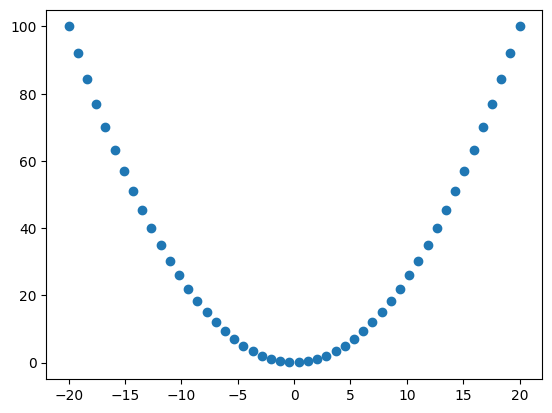

In [ ]:
## Generate random data
distr = np.linspace(-10,10,50)
x = 2*distr
y = distr**2

plt.scatter(x,y)

In [ ]:
def fibonacci(n):

  return fibonacci(n)*fibonacci(n-1)

fibonacci(5)




SyntaxError: expected ':' (<ipython-input-24-f5544edd9fea>, line 2)